## Bootstrapping
___

<br> 

#### General setup
___

In [12]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as ss

%matplotlib inline

<br>

#### Loading the data set
___

In [2]:
# Load the csv file
pop = pd.read_csv('../Data/grades.csv')
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   grade   100 non-null    float64
dtypes: float64(1)
memory usage: 928.0 bytes


In [3]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


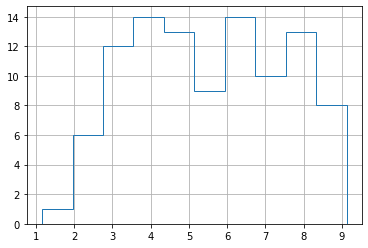

In [4]:
# Checking distribution
pop.grade.hist(histtype='step');

In [5]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


Since the distribution is not a recognizable simple form but the mean for this sample is 5.5. What can be said about true mean value? Since we cannot describe the distribution we cannot simulate it. This is where bootstrapping comes in place. For this we will estimats the mean uncertainty by generating a large family of samples from the one we have and then by characterizing the distribution of the mean over this family.

In [6]:
pop.sample(100, replace=True).describe()

,grade
count,100.000000
mean,5.436154
std,1.751003
min,1.160899
25%,4.212469
50%,5.200295
75%,6.797935
max,8.888042


In [7]:
bootstrap = pd.DataFrame({'meangrade': [pop.sample(100, replace=True).grade.mean() for i in range(1000)]})
bootstrap.head()

,meangrade
0,5.477168
1,5.256366
2,5.661983
3,5.442126
4,5.392712


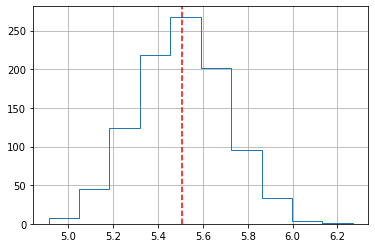

In [8]:
bootstrap.meangrade.hist(histtype='step')
plt.axvline(pop.grade.mean(), c='r', linestyle='--');

In [9]:
bootstrap.meangrade.quantile(0.025), bootstrap.meangrade.quantile(0.975)

(5.120444362274659, 5.8899551006826245)

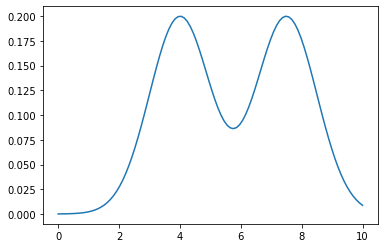

In [14]:
n1 = ss.norm(7.5, 1)
n2 = ss.norm(4, 1)

x = np.linspace(0,10,100)
plt.plot(x, 0.5*n1.pdf(x) + 0.5*n2.pdf(x));

In [22]:
def draw():
    while True:
        v = n1.rvs() if np.random.rand() < 0.5 else n2.rvs()
        if 0 <= v <= 10:
            return v

In [23]:
def dataset(n=100):
    return pd.DataFrame({'grade': [draw() for i in range(n)]})

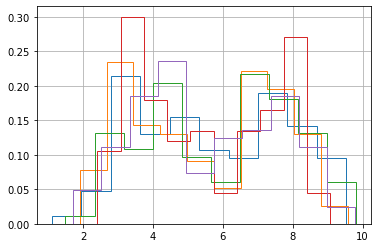

In [27]:
for i in range(5):
    dataset().grade.hist(histtype='step', density=True)

In [28]:
means = pd.DataFrame({'meangrade': [dataset().grade.mean() for i in range(1000)]})

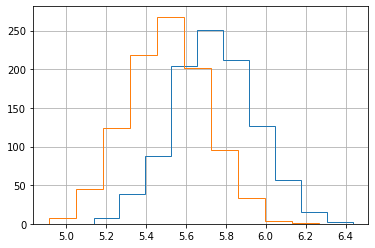

In [32]:
means.meangrade.hist(histtype='step')
bootstrap.meangrade.hist(histtype='step');

<br>

___
#### End.